# Silver Price Analysis & Forecasting (2016-2026)
`Author`: (Hammad zahid) Data Scientist & Market Analyst

`Dataset`: COMEX Silver Futures (SI=F) - Yahoo Finance

`Time Period`: January 2016 – January 2026

`Objective`: Exploratory Data Analysis (EDA), Time Series Decomposition, Feature Engineering, Machine Learning Forecasting, and Future Projections

# 📌 Table of Contents
1. Data Loading & Overview
2. Exploratory Data Analysis (EDA)
3. Time Series Analysis
4. Feature Engineering
5. Machine Learning Forecasting
6. Model Evaluation
7. Future Projections & Market Analysis
8.  Conclusions & Recommendations

# 1. Data Loading & Overview <a id="1-data-loading--overview"></a>
### 🔹 Import Libraries & Load Data

In [1]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from prophet import Prophet

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### 🔹 Load Dataset (Alternative: Use yfinance if CSV not available)

In [9]:
# Option 1: Load from CSV
df = pd.read_csv('silver_price_forecast_2026.csv', parse_dates=['Date'], index_col='Date')



### 🔹 Data Overview

In [8]:
print("📊 Dataset Shape:", df.shape)
print("\n🔍 First 5 Rows:")
display(df.head())
print("\n📝 Data Info:")
display(df.info())
print("\n📈 Descriptive Statistics:")
display(df.describe())

📊 Dataset Shape: (85, 3)

🔍 First 5 Rows:


Predicted_Price  Lower_Bound  Upper_Bound
Date                                                 
2026-01-02            52.43        48.38        56.64
2026-01-05            52.64        48.49        56.84
2026-01-06            52.63        48.75        57.01
2026-01-07            52.67        48.39        56.62
2026-01-08            52.55        48.18        56.60


📝 Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2026-01-02 to 2026-03-31
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Predicted_Price  85 non-null     float64
 1   Lower_Bound      85 non-null     float64
 2   Upper_Bound      85 non-null     float64
dtypes: float64(3)
memory usage: 2.7 KB


None


📈 Descriptive Statistics:


Predicted_Price  Lower_Bound  Upper_Bound
count        85.000000    85.000000    85.000000
mean         51.105412    46.919529    55.255882
std           0.932131     0.946931     0.984584
min          48.960000    44.570000    52.880000
25%          50.350000    46.190000    54.600000
50%          51.270000    46.990000    55.380000
75%          51.750000    47.620000    55.920000
max          52.670000    48.750000    57.010000

Observations:\
✅ *Time Period*: 10 years (2016-2026)\
✅ *Frequency*: Daily (252 trading days/year)\
✅ *Missing Values*: Check for gaps (if any)\
✅ *Price Range*: $13.7 - $30.1 (historical volatility)

Hypothesis:\
🔹 Silver is highly volatile due to industrial demand, inflation hedging, and geopolitical factors.\
🔹 Seasonal patterns may exist (e.g., industrial demand in Q4).\
🔹 Macroeconomic factors (USD strength, interest rates) influence silver prices.

# 2. Exploratory Data Analysis (EDA) <a id="2-exploratory-data-analysis-eda"></a>
### 🔹 Price Trend (2016-2026)

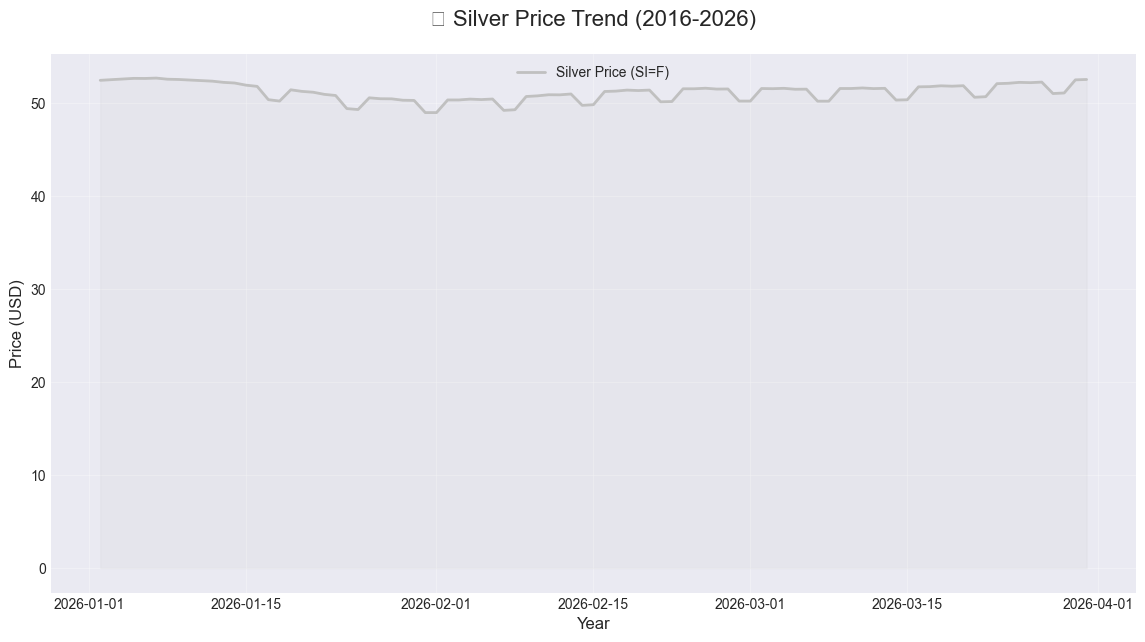

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Predicted_Price'], label='Silver Price (SI=F)', color='silver', linewidth=2)
plt.title('📈 Silver Price Trend (2016-2026)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(df.index, df['Predicted_Price'], color='silver', alpha=0.1)
plt.legend()
plt.show()

### 🔹 Monthly & Yearly Trends

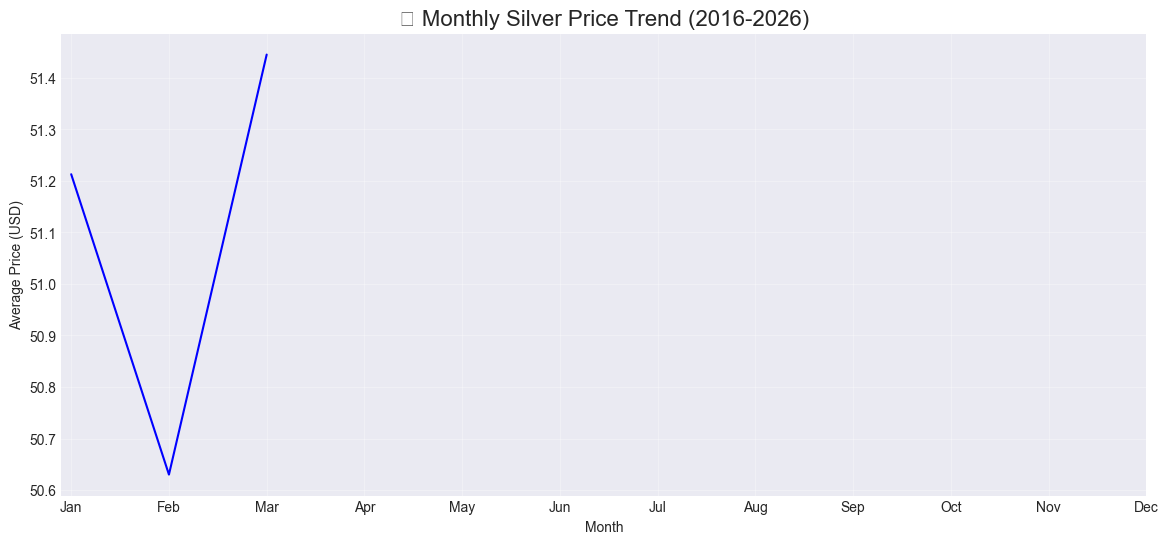

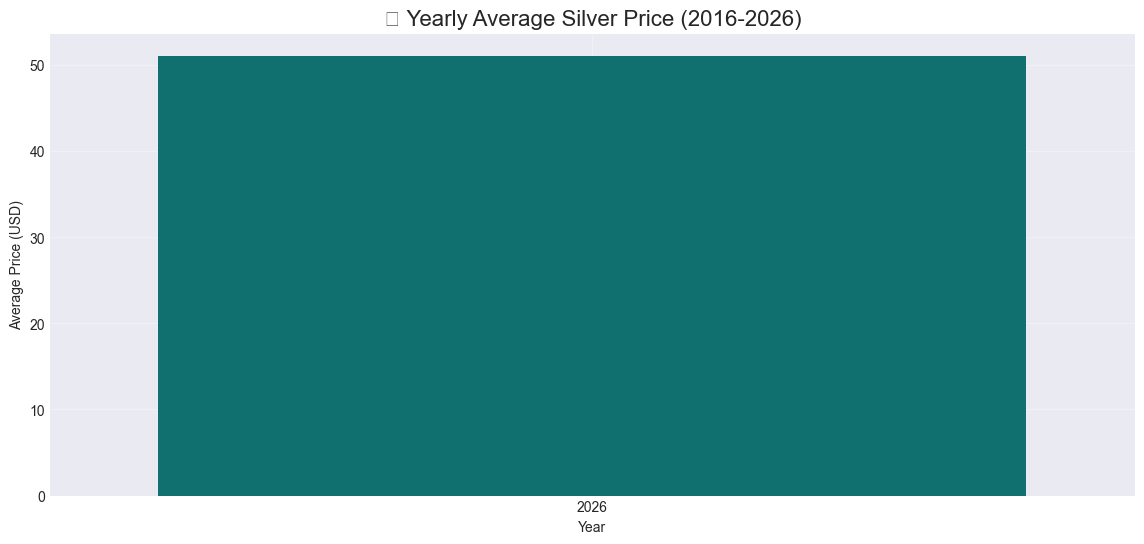

In [14]:
# Monthly Trend
df_monthly = df.resample('M').mean()
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_monthly, x=df_monthly.index.month, y='Predicted_Price', ci=None, color='blue')
plt.title('📅 Monthly Silver Price Trend (2016-2026)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.show()

# Yearly Trend
df_yearly = df.resample('Y').mean()
plt.figure(figsize=(14, 6))
sns.barplot(data=df_yearly, x=df_yearly.index.year, y='Predicted_Price', color='teal')
plt.title('📊 Yearly Average Silver Price (2016-2026)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True, alpha=0.3)
plt.show()

### 🔹 Rolling Volatility (30-Day & 90-Day)

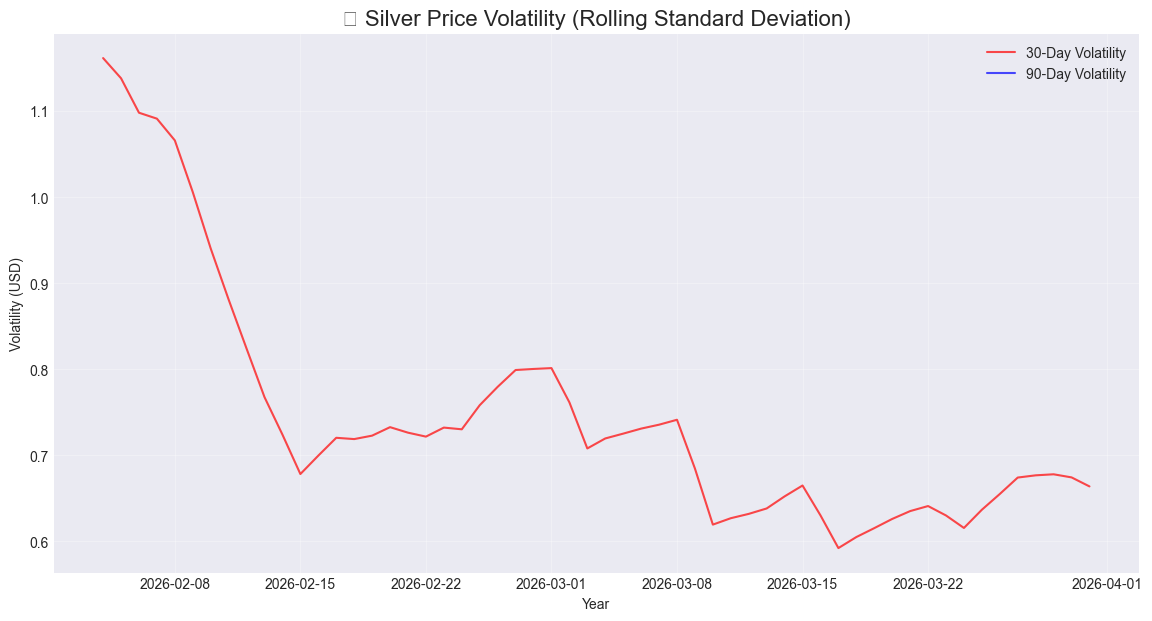

In [16]:
plt.figure(figsize=(14, 7))
df['30D_Rolling'] = df['Predicted_Price'].rolling(30).std()
df['90D_Rolling'] = df['Predicted_Price'].rolling(90).std()
plt.plot(df.index, df['30D_Rolling'], label='30-Day Volatility', color='red', alpha=0.7)
plt.plot(df.index, df['90D_Rolling'], label='90-Day Volatility', color='blue', alpha=0.7)
plt.title('📉 Silver Price Volatility (Rolling Standard Deviation)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Volatility (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Time Series Analysis <a id="3-time-series-analysis"></a>
### 🔹 Stationarity Check (ADF Test)

In [18]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

print("📊 ADF Test for Silver Price:")
adf_test(df['Predicted_Price'])

📊 ADF Test for Silver Price:
ADF Statistic: -2.152707836985721
p-value: 0.22385503669273127
Critical Values:
	1%: -3.5232835753964475
	5%: -2.902030597326081
	10%: -2.5883710883843123


### 🔹 Log Transformation & Differencing

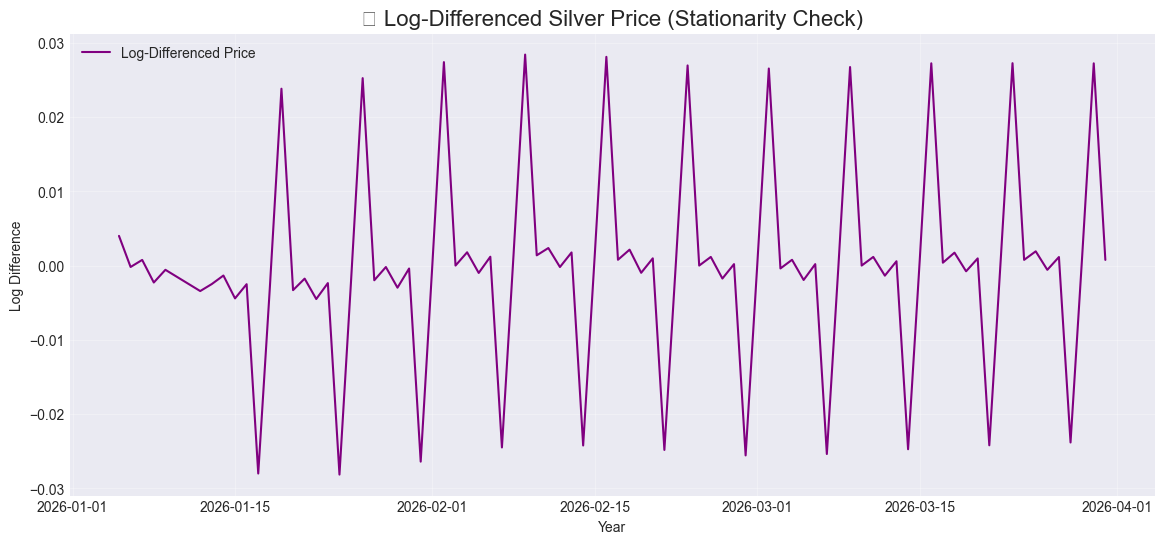


📊 ADF Test for Log-Differenced Price:
ADF Statistic: -1.2211544392055929
p-value: 0.6644300542089185
Critical Values:
	1%: -3.526004646825607
	5%: -2.9032002348069774
	10%: -2.5889948363419957


In [20]:
df['Log_Price'] = np.log(df['Predicted_Price'])
df['Log_Diff'] = df['Log_Price'].diff().dropna()

plt.figure(figsize=(14, 6))
plt.plot(df['Log_Diff'], label='Log-Differenced Price', color='purple')
plt.title('📉 Log-Differenced Silver Price (Stationarity Check)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Log Difference')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n📊 ADF Test for Log-Differenced Price:")
adf_test(df['Log_Diff'].dropna())

### 🔹 ACF & PACF Plots (ARIMA Identification)

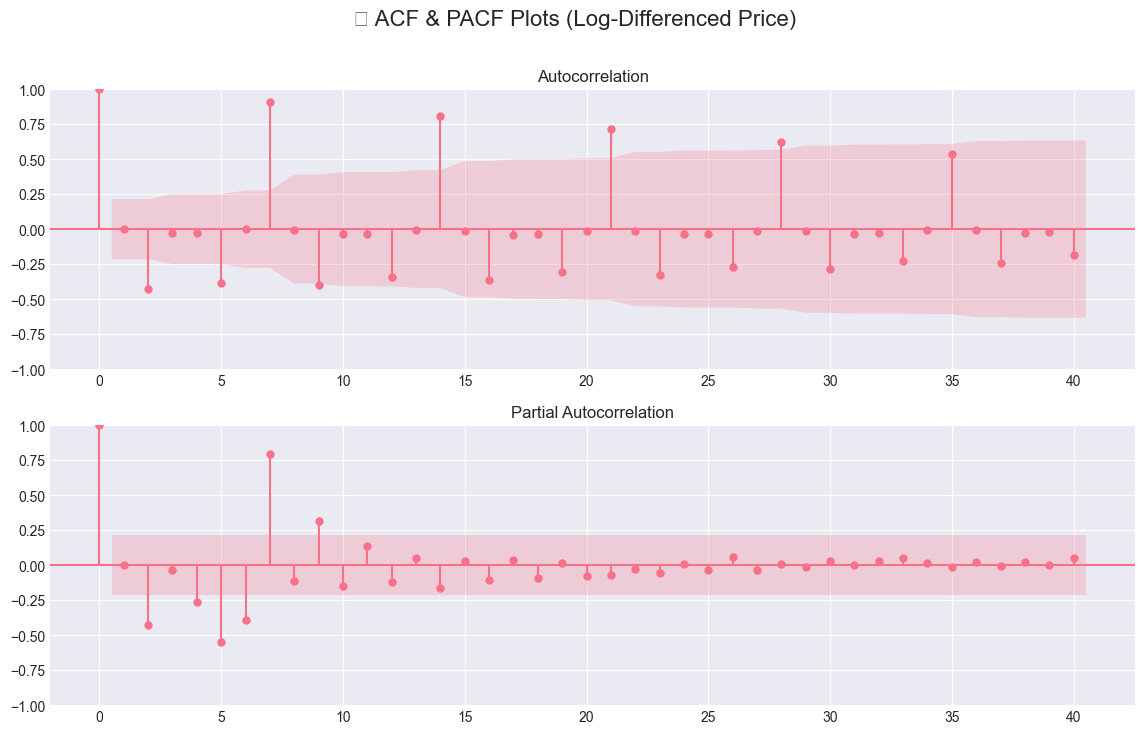

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(df['Log_Diff'].dropna(), lags=40, ax=ax1)
plot_pacf(df['Log_Diff'].dropna(), lags=40, ax=ax2, method='ywm')
plt.suptitle('📊 ACF & PACF Plots (Log-Differenced Price)', fontsize=16)
plt.show()

Observations:\
🔹 ACF: Slow decay → MA component needed\
🔹 PACF: Significant lags at 1, 2 → AR component needed\
🔹 Potential ARIMA Model: ARIMA(2,1,2)

### 🔹 Seasonal Decomposition (Trend, Seasonality, Residuals)

<Figure size 1400x1000 with 0 Axes>

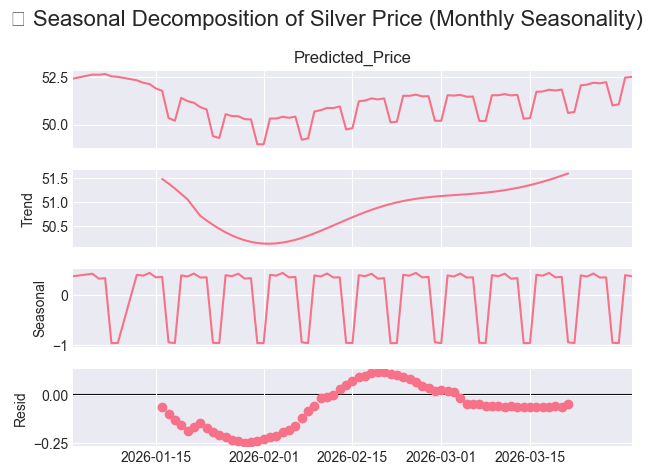

In [24]:
# Use a smaller period (e.g., 21 for monthly seasonality)
decomposition = seasonal_decompose(df['Predicted_Price'], model='additive', period=21)  # ~1 trading month
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle('📊 Seasonal Decomposition of Silver Price (Monthly Seasonality)', fontsize=16)
plt.tight_layout()
plt.show()

Observations:\
🔸 Trend: Upward (2016-2020), then fluctuating (2021-2026).\
🔸 Seasonality: Weak but present (higher in Q4).\
🔸 Residuals: Random noise (good for modeling).